In [1]:
#-----------IMPORT REQUIRED LIBRARIES--------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:

fred_key = 'c58628bbe9f826f14362860e0648f700 '


In [3]:
fred = Fred(api_key=fred_key)

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-11-15   2023-11-15   
CSUSHPINSA          CSUSHPINSA     2023-11-15   2023-11-15   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-11-15   2023-11-15   
SP500                    SP500     2023-11-15   2023-11-15   
MEHOINUSA672N    MEHOINUSA672N     2023-11-15   2023-11-15   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-11-13  Daily, Close   
CSUSHPINSA            1987-01-01      2023-08-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-11-13  Daily, Close   
SP500                 2013-11-15      2023-11-14  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-11-14 08:58:02-06:00   
CSUSHPINSA                           NSA  2023-10-31 08:12:01-05:00   
BAMLH0A0HYM2EY                       NSA  2023-11-14 08:58:06-06:00   
SP500                                NSA  2023-11-14 19:10:59-06:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          81  Household data are collected as of March.  As ...

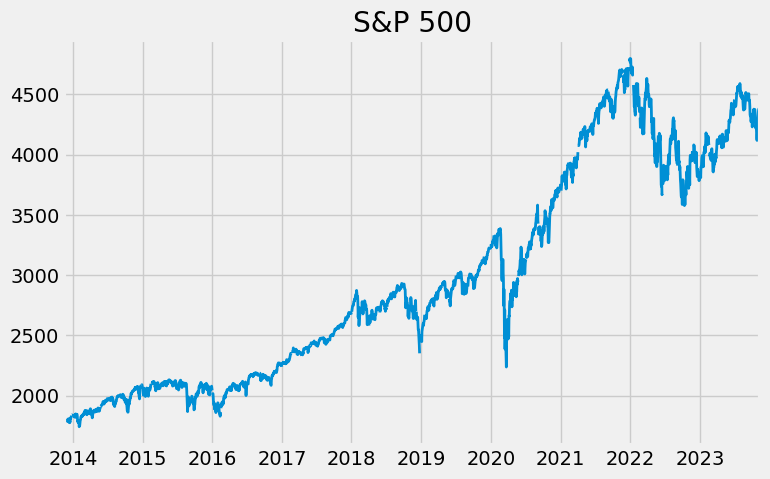

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(8, 5), title='S&P 500', lw=2)
plt.show()

In [7]:
unemployed_dataset = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemployed_dataset = unemployed_dataset.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemployed_dataset = unemployed_dataset.loc[unemployed_dataset['title'].str.contains('Unemployment Rate')]

In [8]:
all_results = []

for myid in unemployed_dataset.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [ ]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [ ]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemployed_dataset['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 7, 1, 0, 0),
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 4.6, 4.6, 4.7]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Texas',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 7, 1, 0, 0),
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 4.1, 4.1, 4.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'New York',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 7, 1, 0, 0),
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  3.9,  3.9,  4. ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Florida',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 7, 1, 0, 0),
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 2.7, 2.7, 2.8]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Ohio<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Ohio',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Ohio',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetim

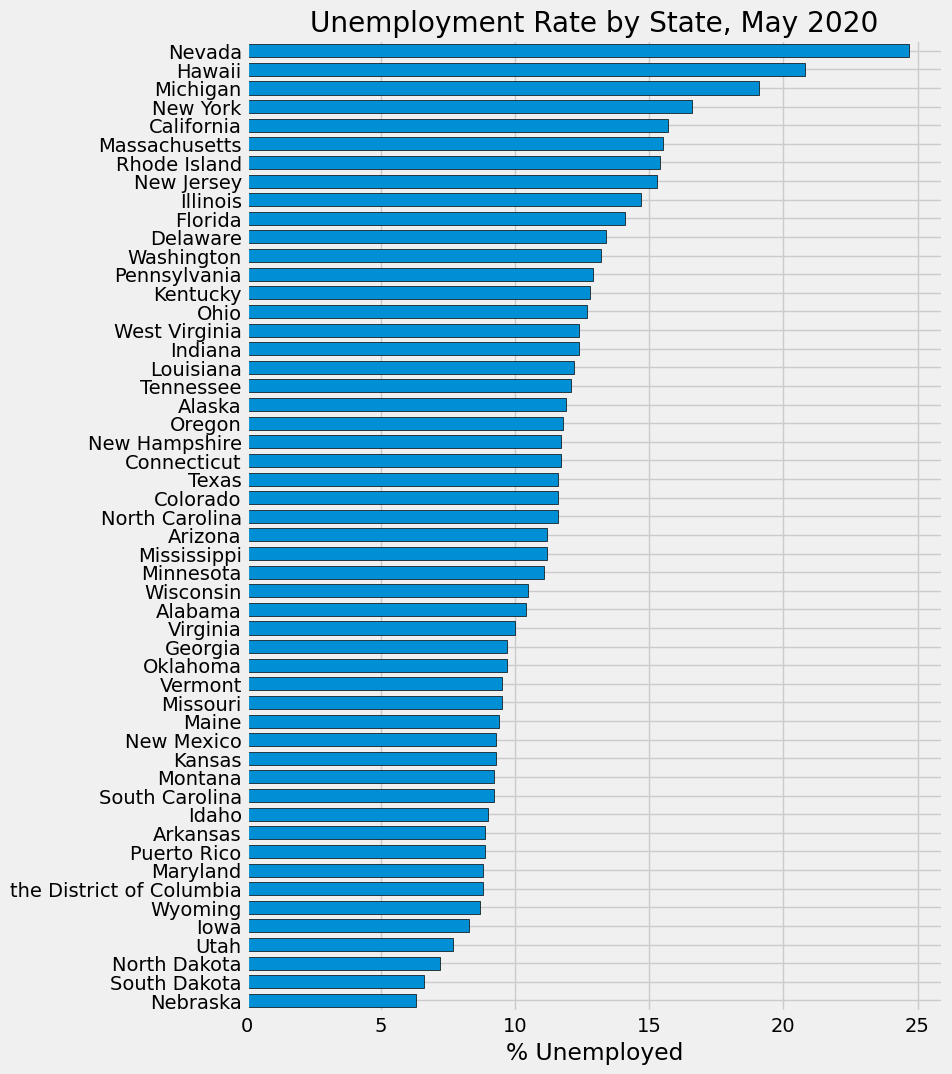

In [ ]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [ ]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

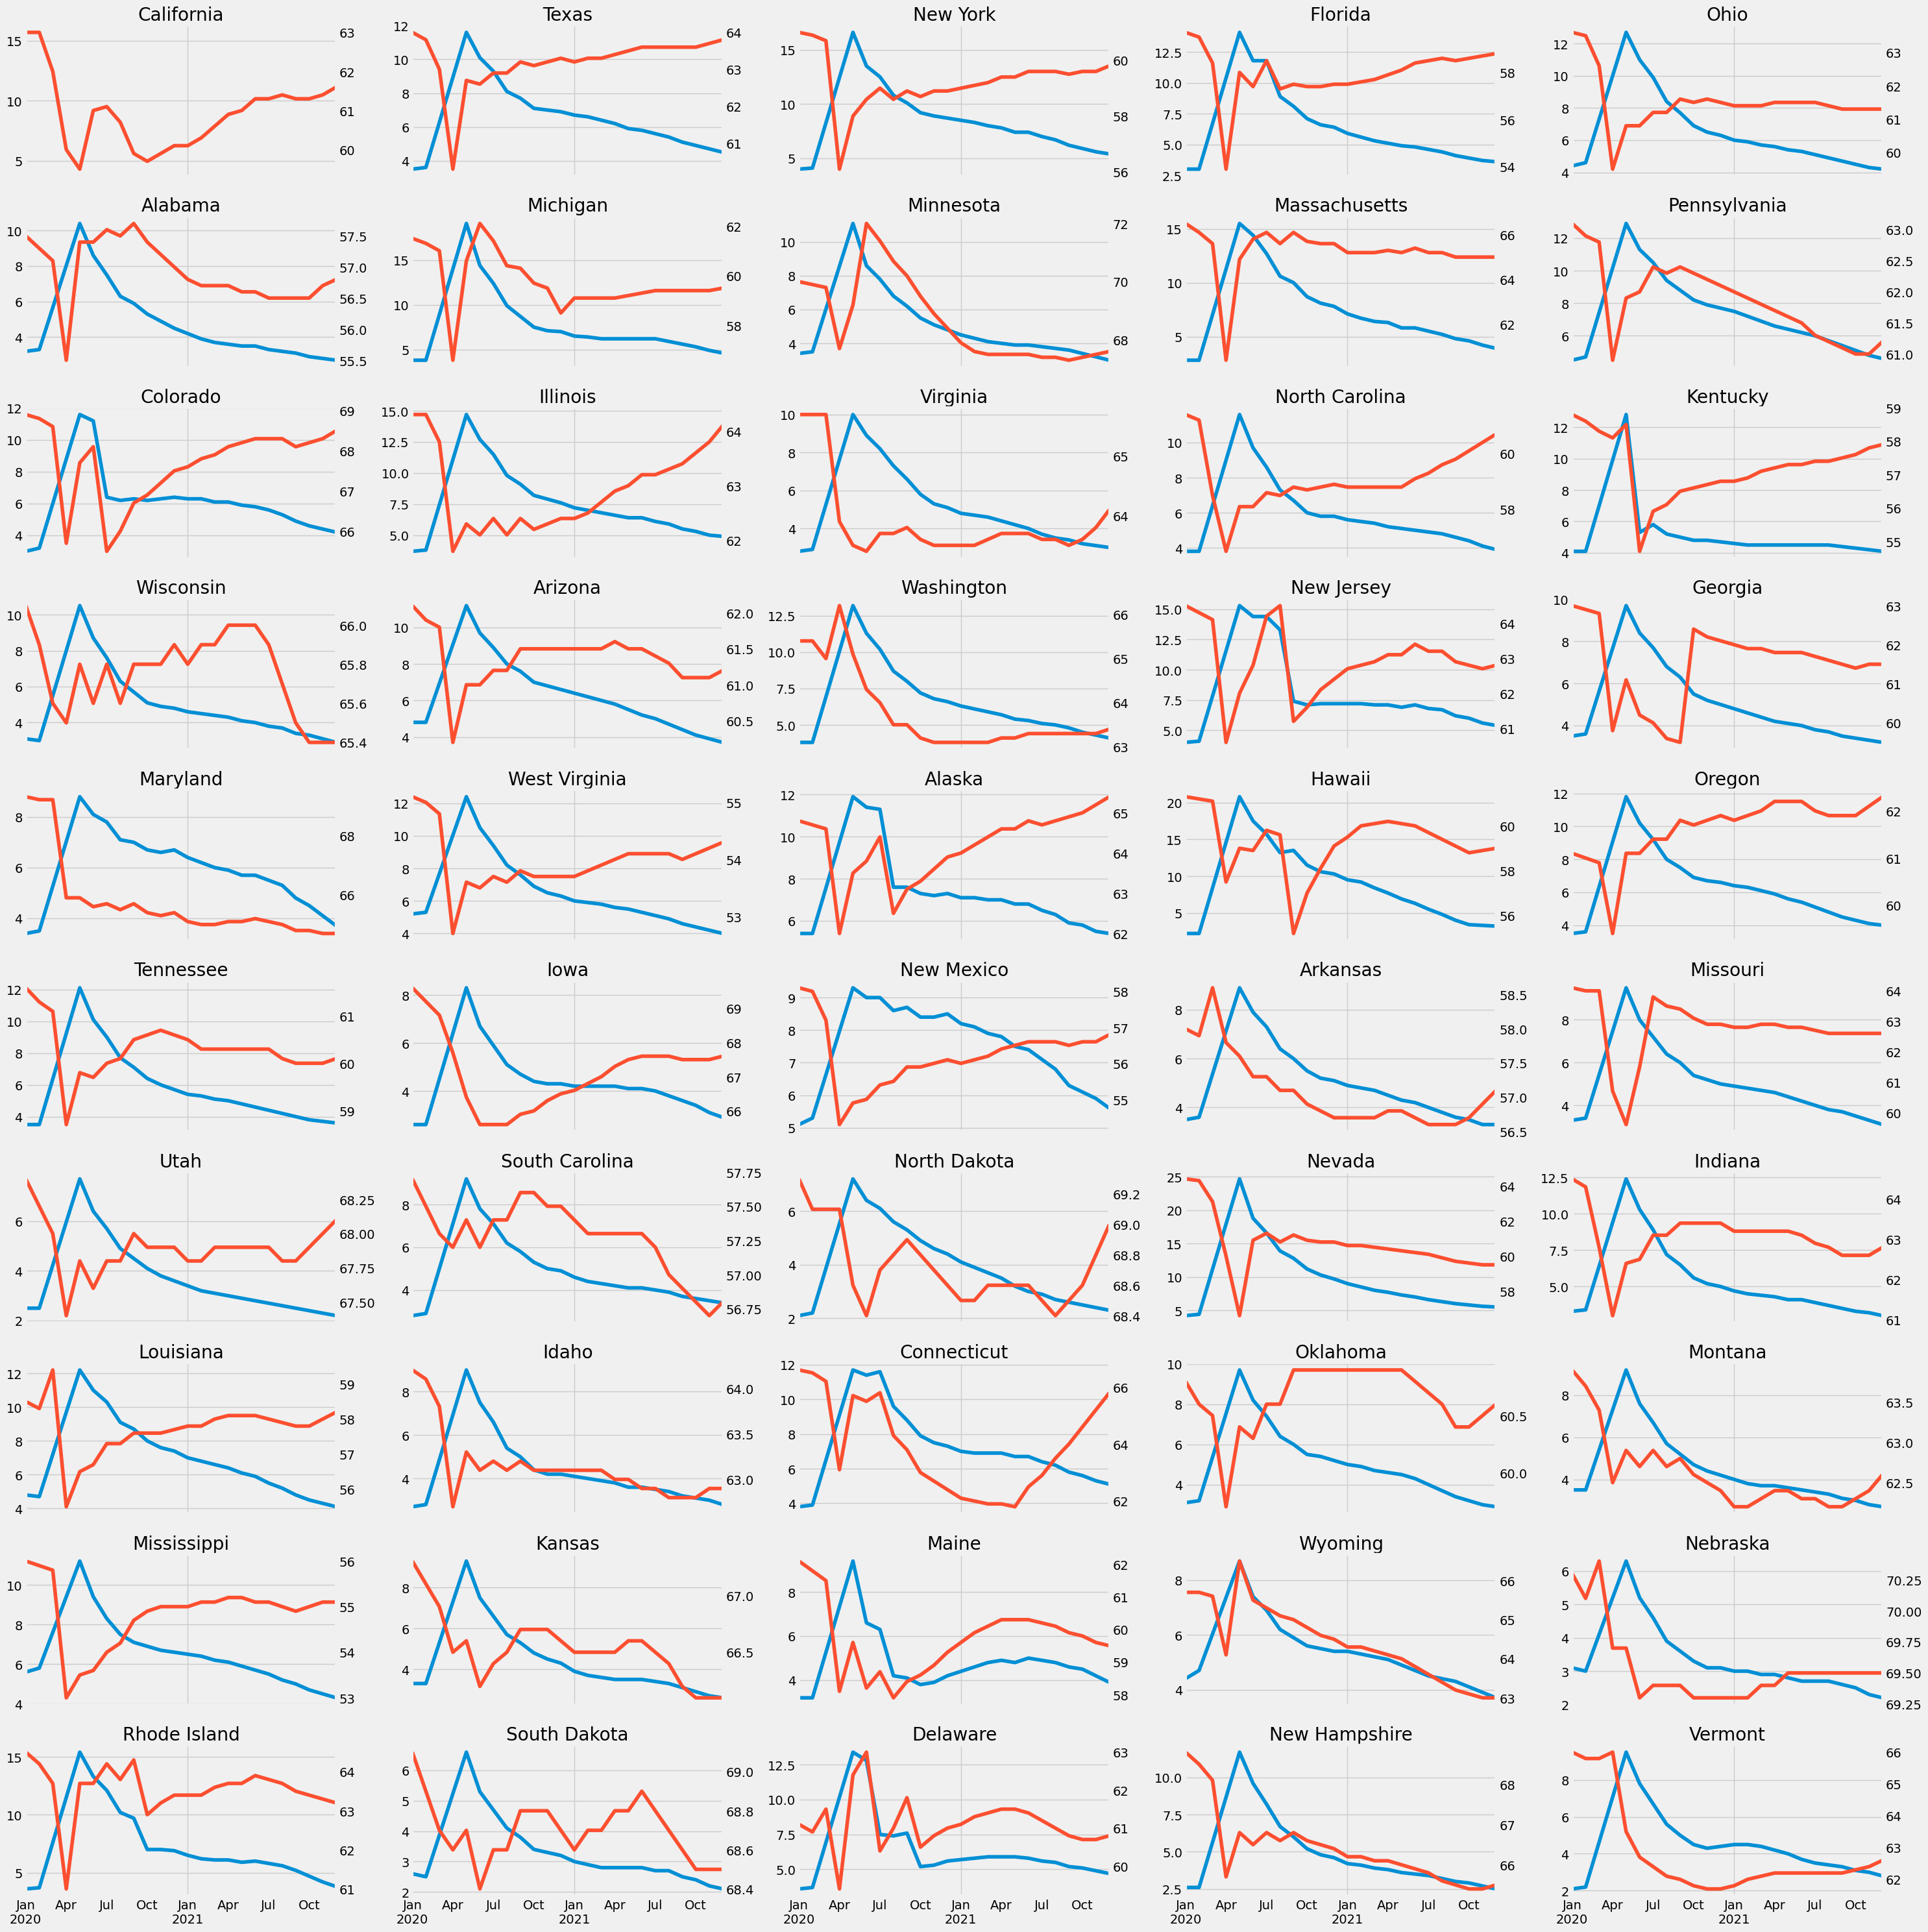

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

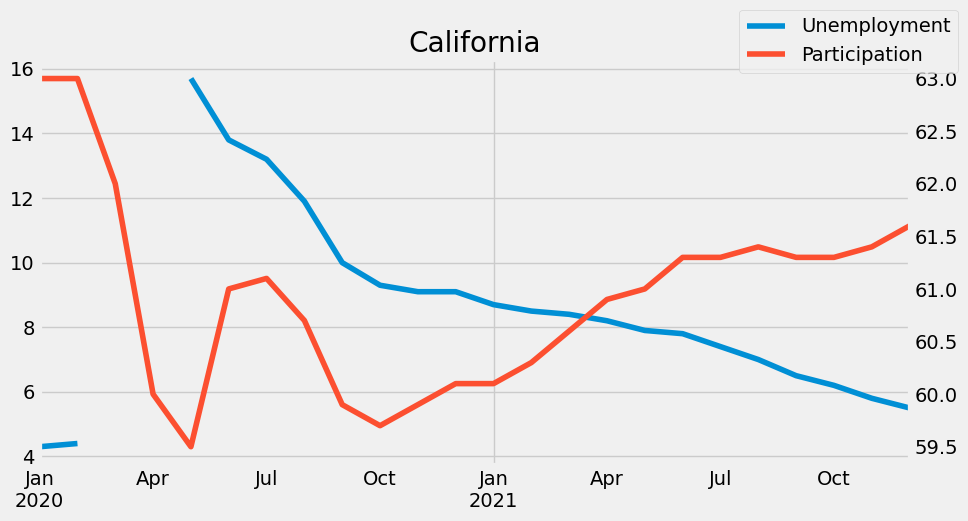

In [ ]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()